In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size':25})
#plt.rcParams["font.family"] = "sans"


import matplotlib.pyplot as plt

# Business Problem

One of the long-lasting business issues in the world of Pharmaceutical companies is the  persistency of drugs which can  significantly affect the outcome of medical treatments. One of the important factors that is related to persistency is the adherence of the patient to the prescribed regimens, meaning if the patient is committed to the prescribed regimens or not. In fact, related studies show that around 50%-60% of the patients with different illnesses in US miss doses, take the wrong doses, or drop off treatment in the first year. 
Additionally, the illness, either chronic or acute can be related to the adherence and persistency of drugs. To solve the problem, we need to find out factors that are the most correlated to the persistence of drugs and adherence. 


# Data set 

In [2]:
dataset = pd.read_csv('Healthcare_dataset.csv')

In [3]:
dataset

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
print(dataset.Count_Of_Risks)

0       0
1       0
2       2
3       1
4       1
       ..
3419    1
3420    0
3421    1
3422    0
3423    1
Name: Count_Of_Risks, Length: 3424, dtype: int64


In [6]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())

Rows     :  3424
Columns  :  69

Features : 
 ['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_O

In [7]:
dataset.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


# Missing/ NAN values 

In [8]:
#to check if we have missing values 
dataset.isnull().sum()  #Returns the sum of NaN values in each column.#there is no Nan values

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [9]:
#check if there is any duplication in dataset

print(dataset.duplicated(subset=None, keep='first'))

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Length: 3424, dtype: bool


In [10]:
null=pd.DataFrame(dataset.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(dataset.isna().sum()/len(dataset)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)


#find out about NULL values in the data 
#There is not any missing or null data

,Null Values,% Missing Values


In [11]:
 dataset.isna().any()

Ptid                              False
Persistency_Flag                  False
Gender                            False
Race                              False
Ethnicity                         False
                                  ...  
Risk_Hysterectomy_Oophorectomy    False
Risk_Estrogen_Deficiency          False
Risk_Immobilization               False
Risk_Recurring_Falls              False
Count_Of_Risks                    False
Length: 69, dtype: bool

In [12]:
#is there any correlation between features ? 
describeNum = dataset.describe(include =['float64', 'int64', 'object'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)
#why we have so many Nans ?


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ptid,3424,3424,P1,1,nan,nan,nan,nan,nan,nan,nan
Persistency_Flag,3424,2,Non-Persistent,2135,nan,nan,nan,nan,nan,nan,nan
Gender,3424,2,Female,3230,nan,nan,nan,nan,nan,nan,nan
Race,3424,4,Caucasian,3148,nan,nan,nan,nan,nan,nan,nan
Ethnicity,3424,3,Not Hispanic,3235,nan,nan,nan,nan,nan,nan,nan
Region,3424,5,Midwest,1383,nan,nan,nan,nan,nan,nan,nan
Age_Bucket,3424,4,>75,1439,nan,nan,nan,nan,nan,nan,nan
Ntm_Speciality,3424,36,GENERAL PRACTITIONER,1535,nan,nan,nan,nan,nan,nan,nan
Ntm_Specialist_Flag,3424,2,Others,2013,nan,nan,nan,nan,nan,nan,nan
Ntm_Speciality_Bucket,3424,3,OB/GYN/Others/PCP/Unknown,2104,nan,nan,nan,nan,nan,nan,nan


In [13]:
for col in dataset: #print the unique of each column
    print("column_name:",col,"---unique:", dataset[col].unique())

column_name: Ptid ---unique: ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
column_name: Persistency_Flag ---unique: ['Persistent' 'Non-Persistent']
column_name: Gender ---unique: ['Male' 'Female']
column_name: Race ---unique: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
column_name: Ethnicity ---unique: ['Not Hispanic' 'Hispanic' 'Unknown']
column_name: Region ---unique: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
column_name: Age_Bucket ---unique: ['>75' '55-65' '65-75' '<55']
column_name: Ntm_Speciality ---unique: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT 

# Exploratory Data analysis

The objective is to understand how the persistency_flag variable is related to other variables and what columns are important and what columns are not


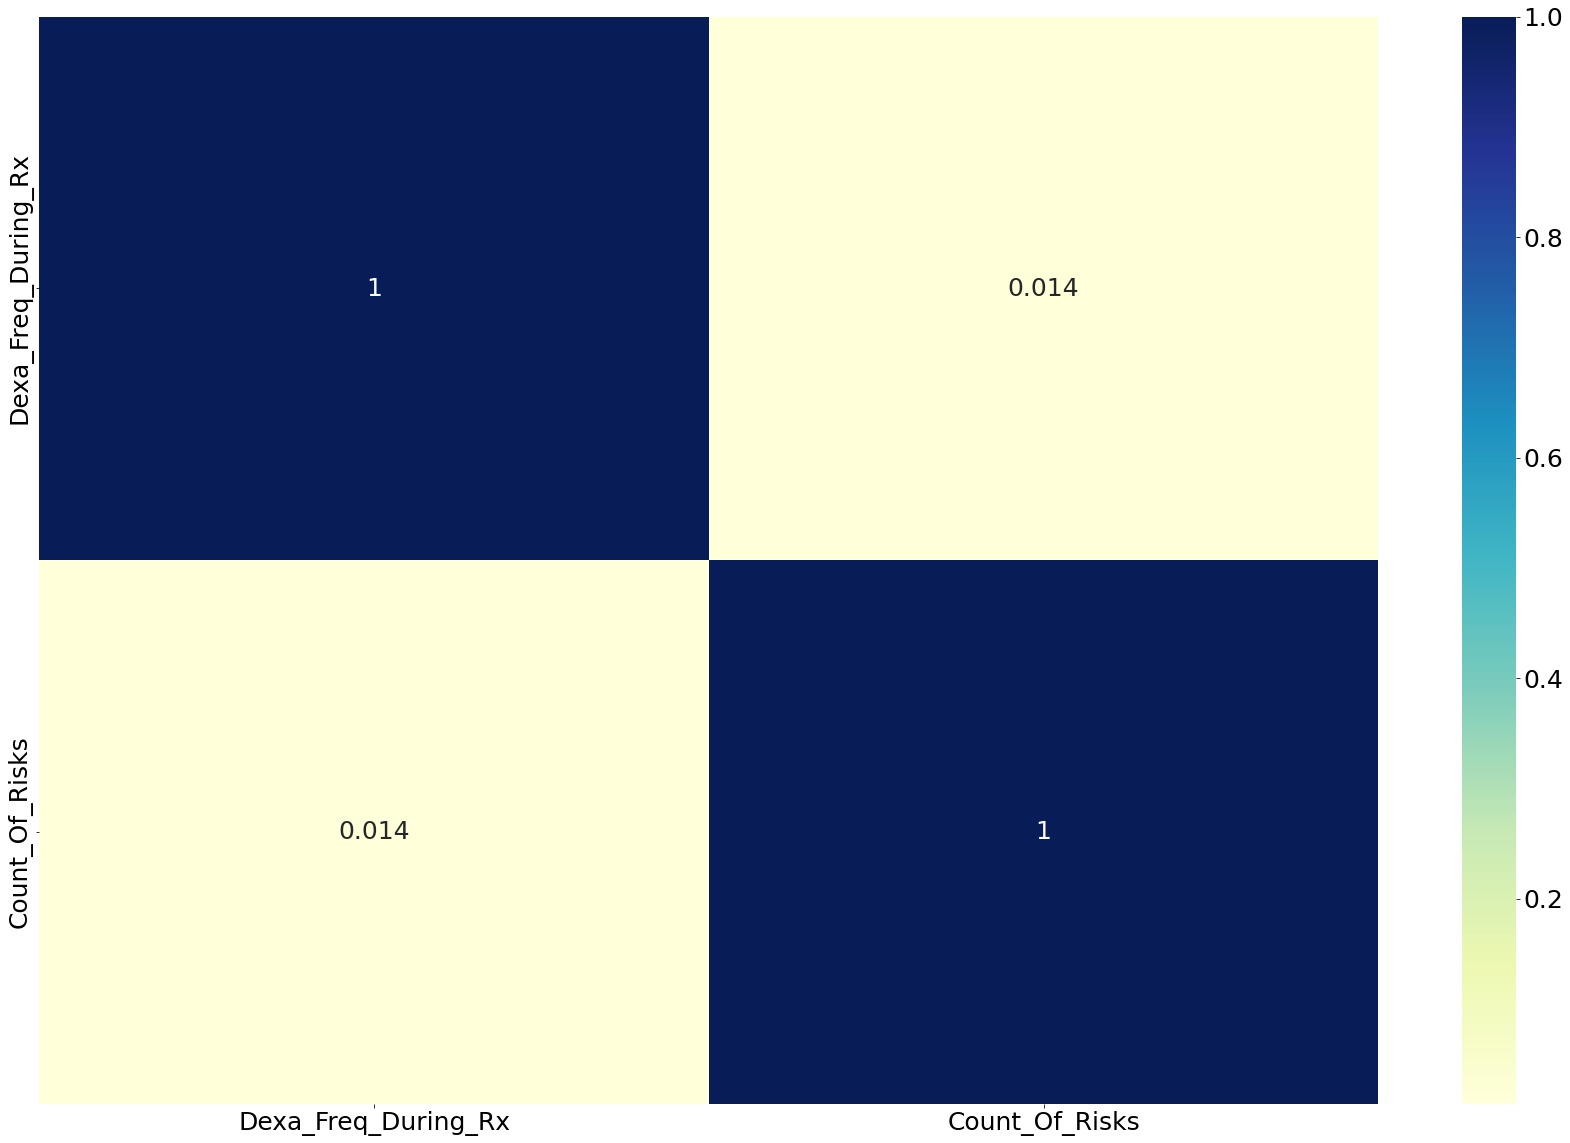

In [14]:
#It is important to realize which columns to drop and which columns to not drop. For that we need to find correlation


plt.figure(figsize=(30,20))
ax = sns.heatmap(data = dataset.corr(),cmap='YlGnBu',annot=True)

#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5,top - 0.5)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

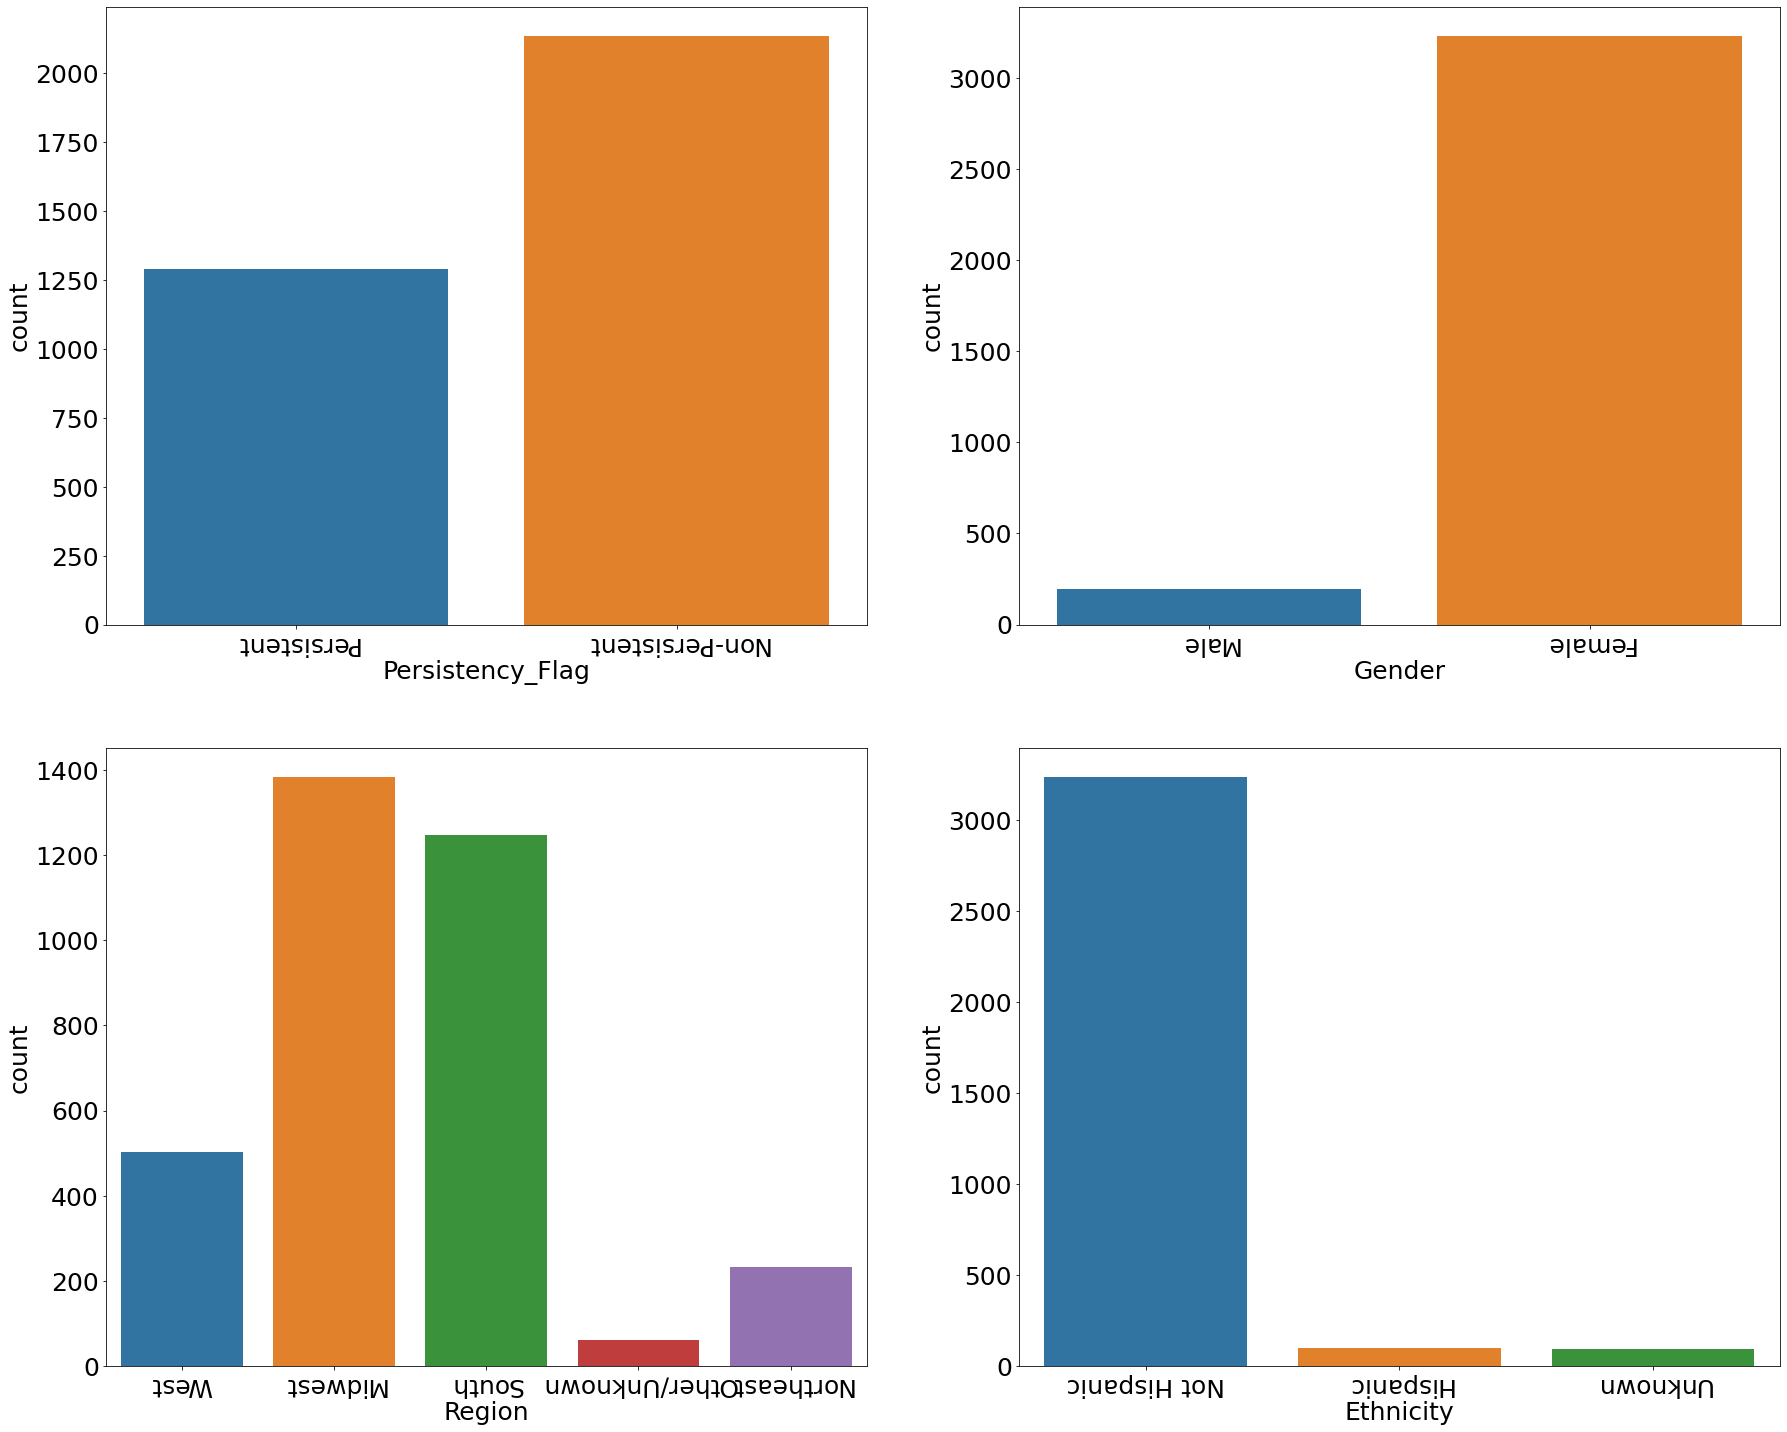

In [15]:
Categorical1 = ['Persistency_Flag','Gender', 'Region','Ethnicity' ]


fig, ax = plt.subplots(2, 2, figsize=(30,25))
for variable, subplot in zip(Categorical1, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(180)
        
#the number of non persistent drugs and Female participants is higher in this dataset.
#

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

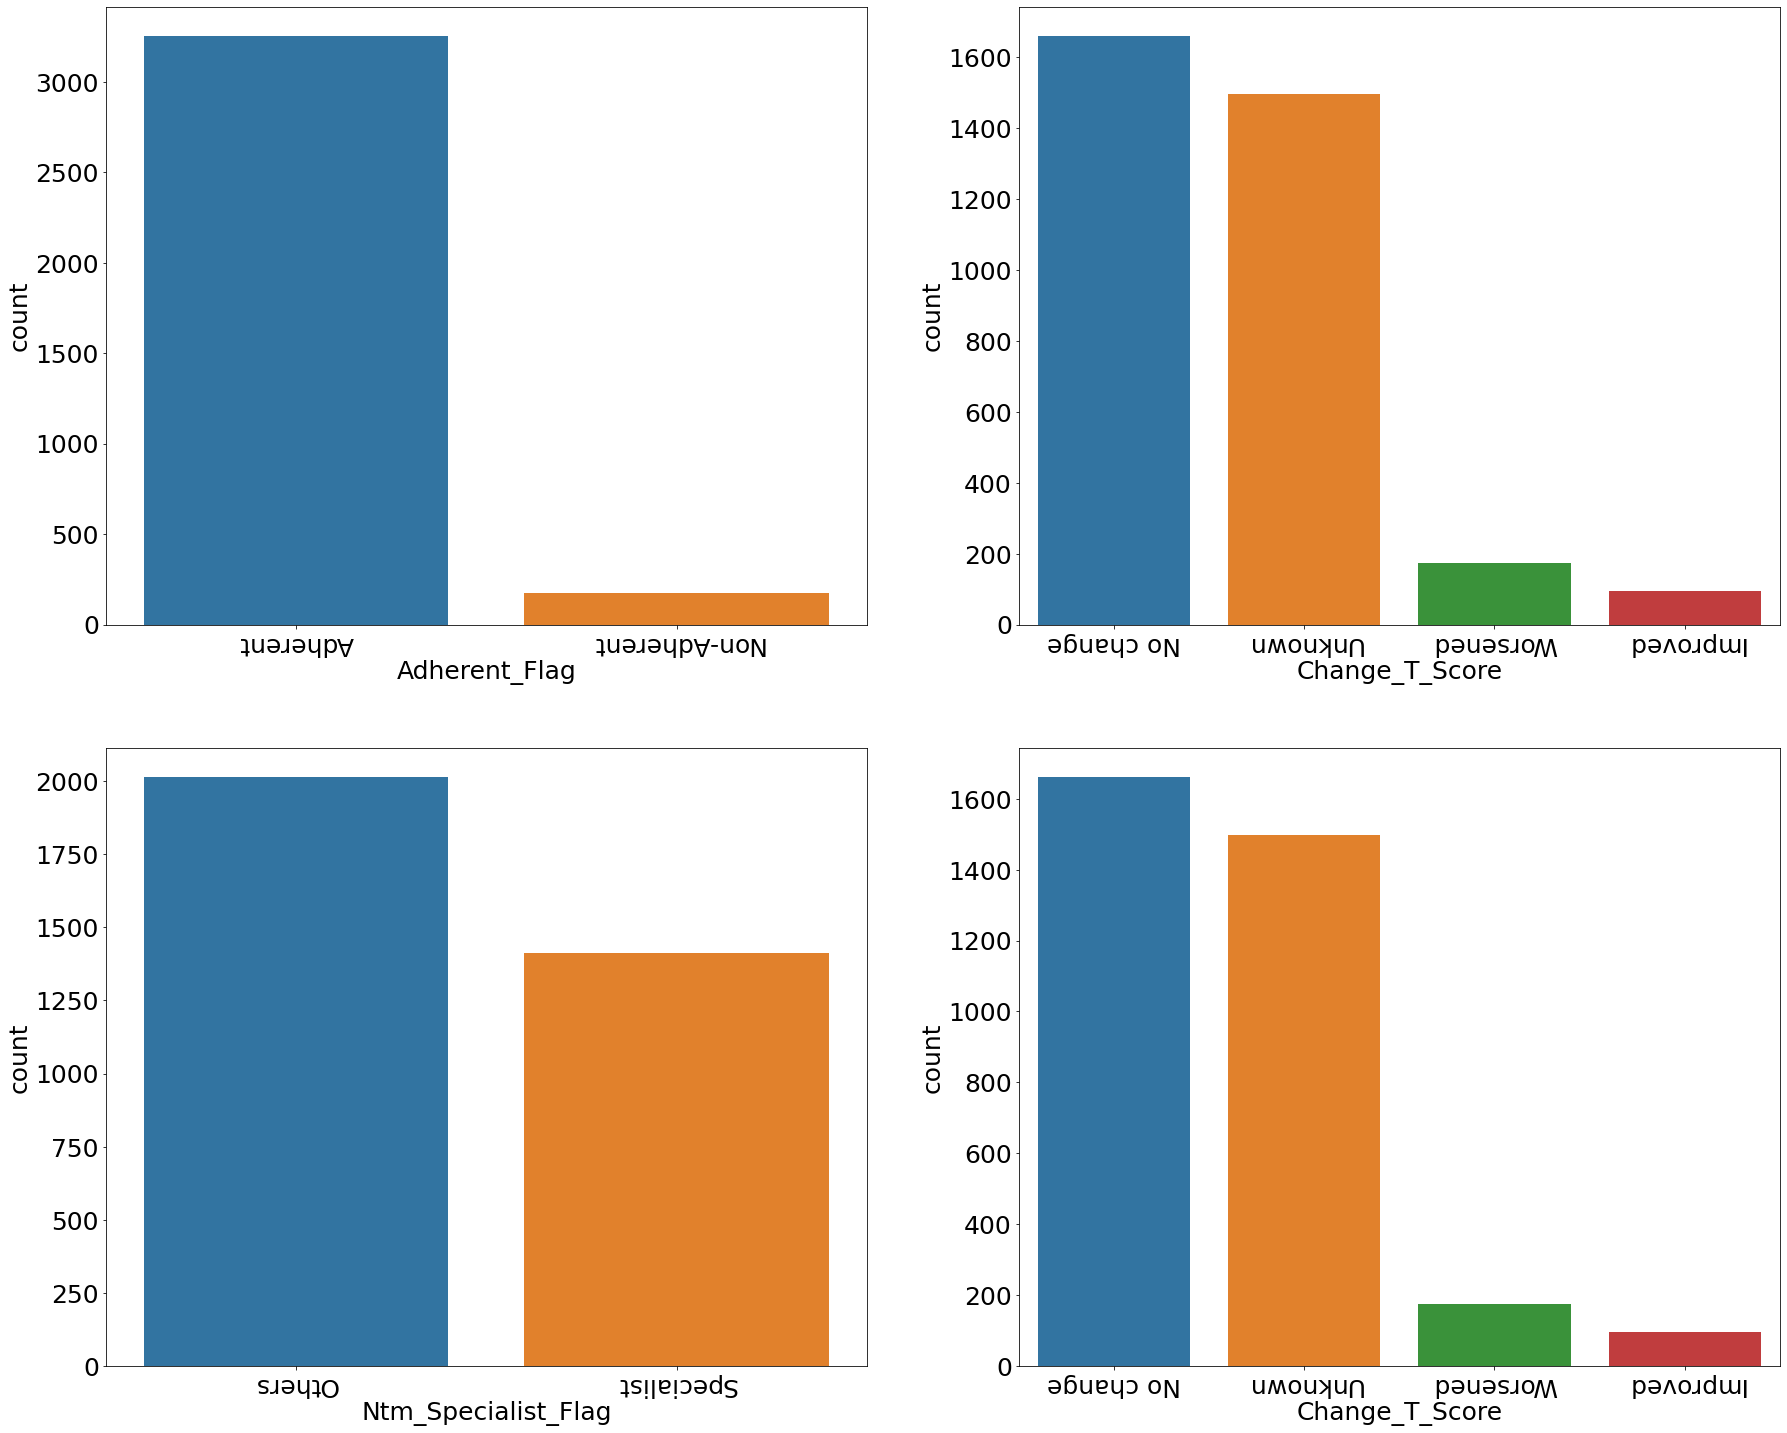

In [16]:
Categorical2 = ['Adherent_Flag','Change_T_Score','Ntm_Specialist_Flag','Change_T_Score']


fig, ax = plt.subplots(2, 2, figsize=(30,25))
for variable, subplot in zip(Categorical2, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(180)


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


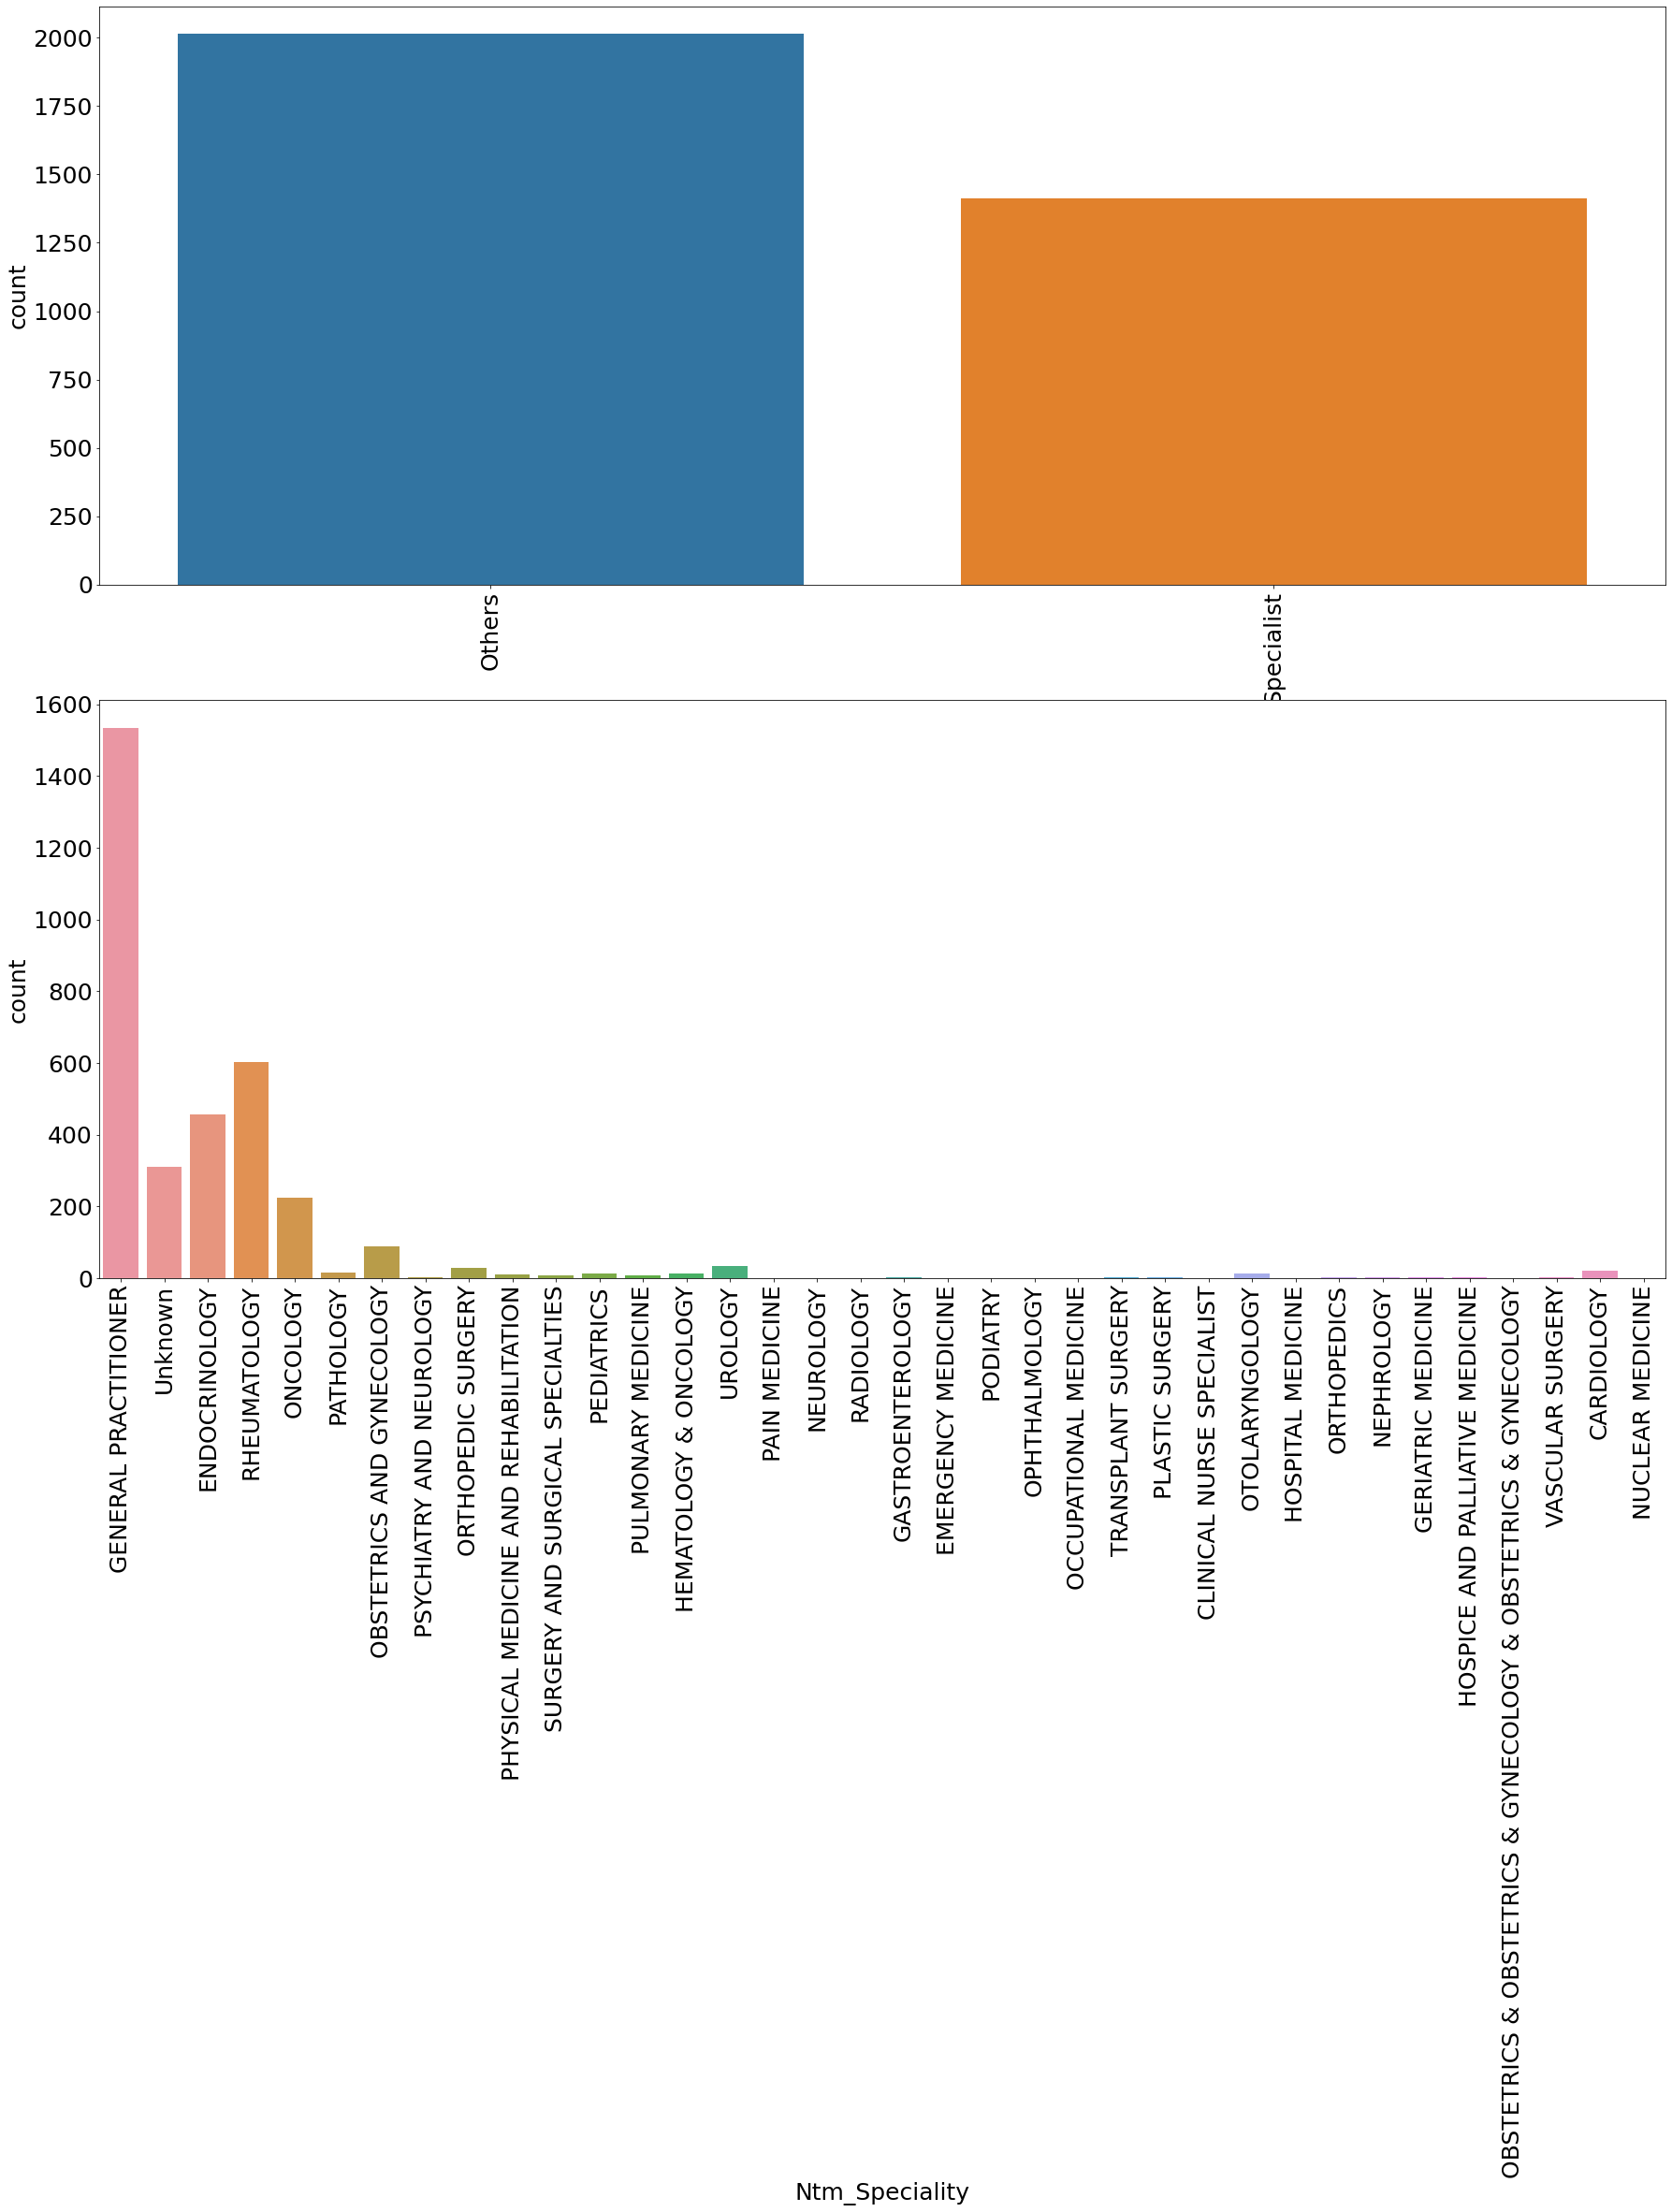

In [17]:
Categorical3 = ['Ntm_Specialist_Flag','Ntm_Speciality' ]

fig, ax = plt.subplots(2, 1, figsize=(30,25))
for variable, subplot in zip(Categorical3, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#these two columns does not seem to provide any valuable information regarding Persistency better to drop them

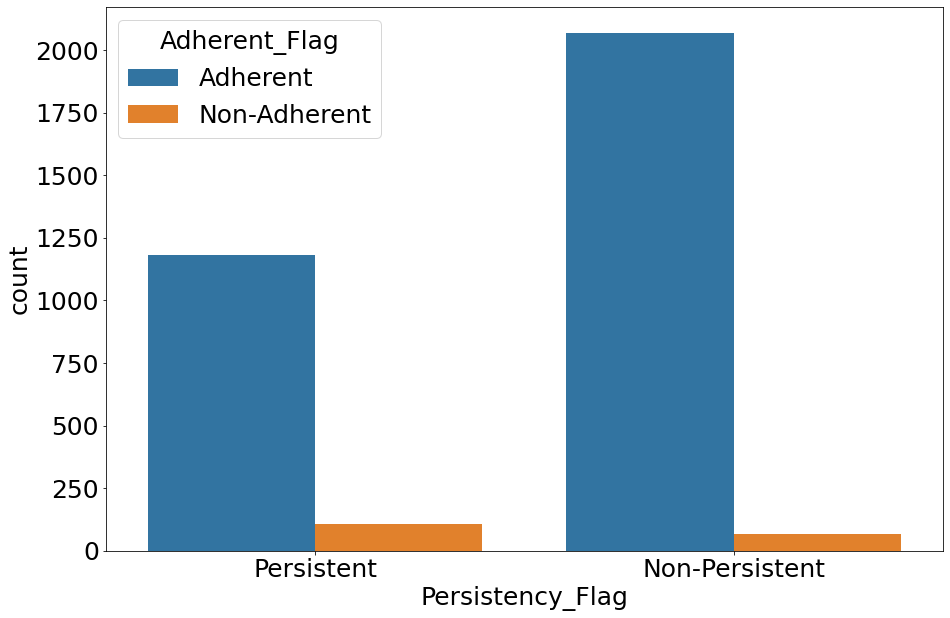

In [18]:
#examine relation between persistency with other factors : 
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Adherent_Flag", data=dataset)

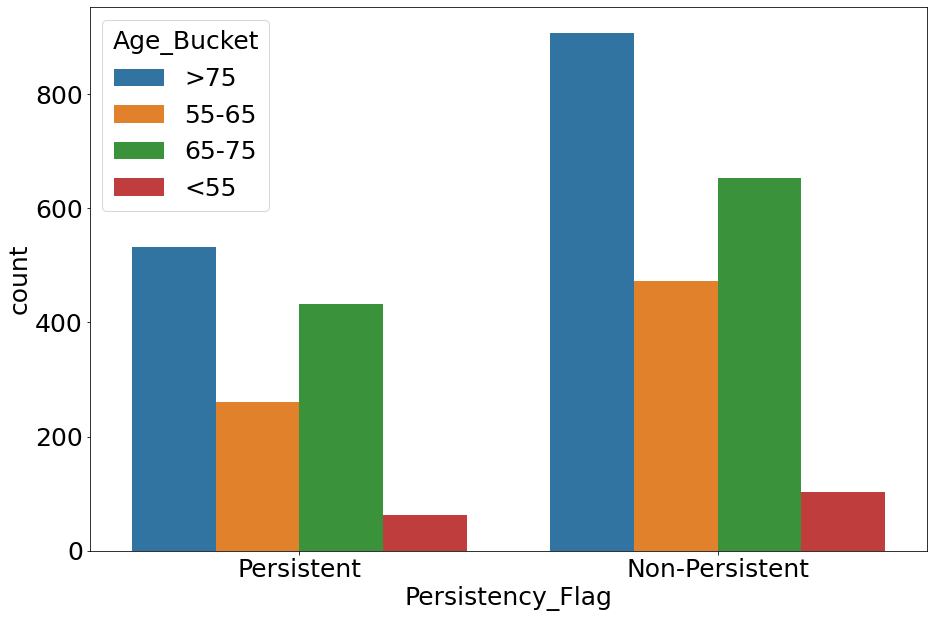

In [19]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Age_Bucket", data=dataset)

#the number of patients in each age interval is high for Non-Persistent 

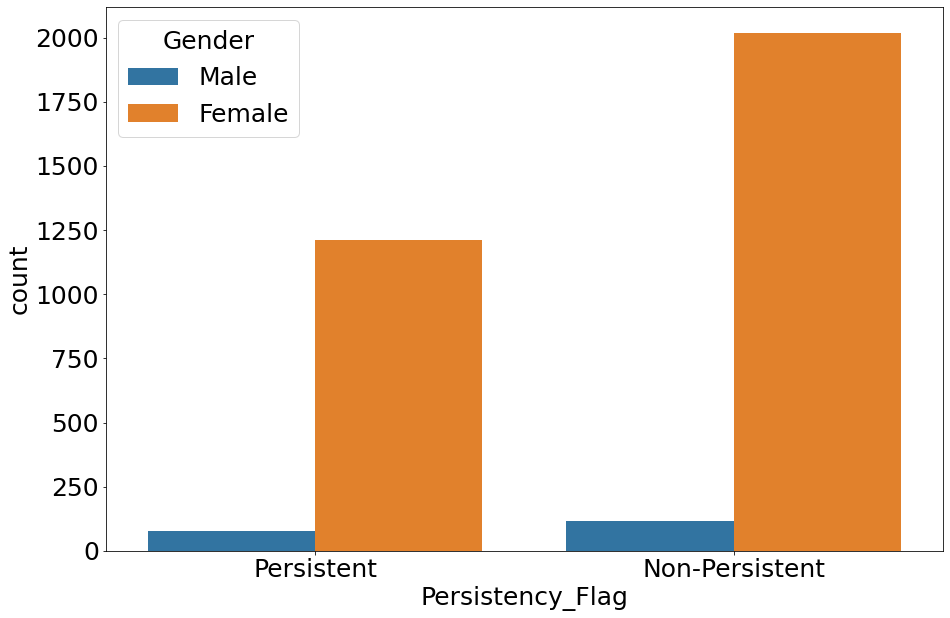

In [20]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Gender", data=dataset)
#also the number of females are higher in general in the Persistent category

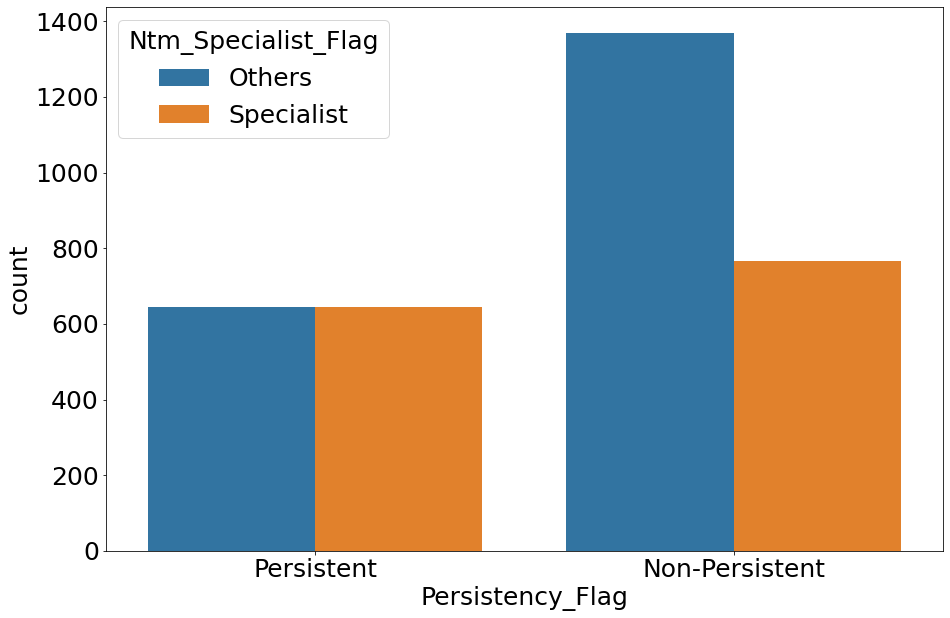

In [21]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Ntm_Specialist_Flag", data=dataset)


# Outliers 

The first step is to examine if there is any outliers in the dataser

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


6.8087302112992285


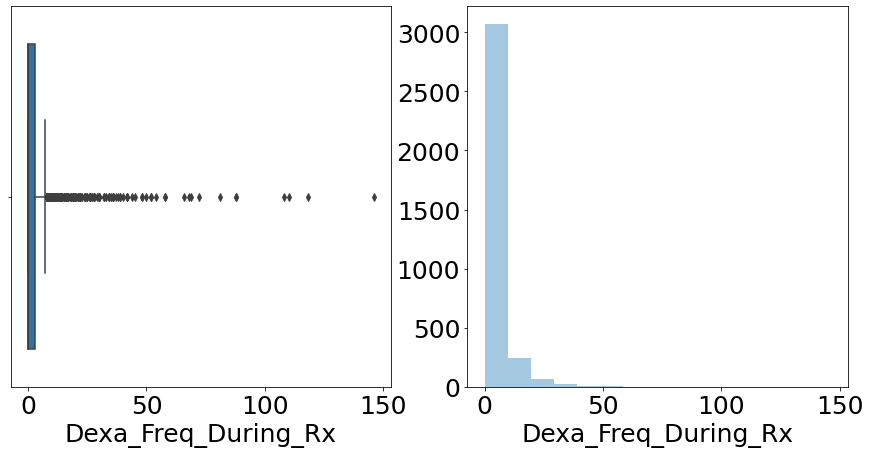

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = dataset['Dexa_Freq_During_Rx'], ax = axes[0])
sns.distplot(dataset['Dexa_Freq_During_Rx'], bins = 15, kde = False, ax = axes[1])

#there are outliers 

#check for skewness
print(dataset['Dexa_Freq_During_Rx'].skew())
#also the Dexa_Freq_During_Rx is right-skewed  since the skewness is higher than 6.5 

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.8797905232898707


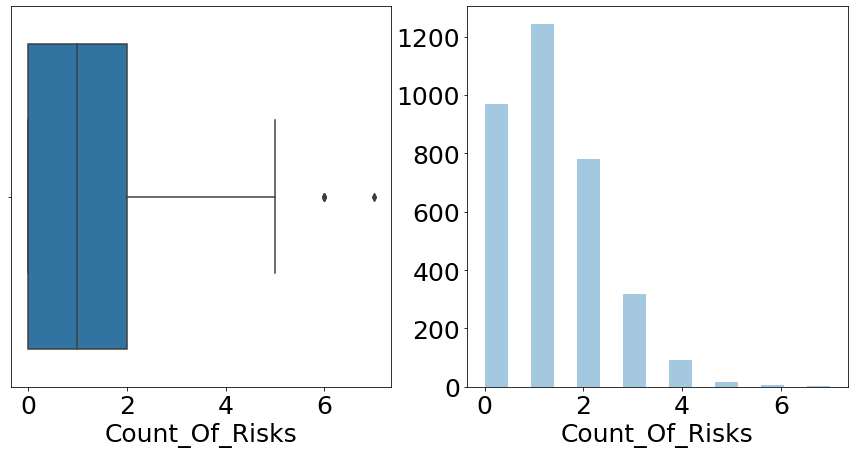

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = dataset['Count_Of_Risks'], ax = axes[0])
sns.distplot(dataset['Count_Of_Risks'], bins = 15, kde = False, ax = axes[1])

#there are outliers in the count_of_of_risks column

#check for skewness
print(dataset['Count_Of_Risks'].skew())
#this column is not skewed - the score is about 0.87.

# Z score

My first approach is to use Z scores to remove outliers from count of risks and from Dexa_Freq_During_Rx column. Z score finds the relationship of each data point with standard deviation and mean of the group of data points. so Z score rescales data and look for data points which are too far from zero.

In [24]:
from scipy import stats
import numpy as np

dexa_freq = dataset['Dexa_Freq_During_Rx']
z = np.abs(stats.zscore(dexa_freq))
threshold = 3 #the threshold in which the data are outliers is 
#print(np.where(z > 3))
filtered = np.where(z > 3)
print(filtered[0])
print(filtered[0][1])

[ 198  241  541  651 1265 1360 1370 1398 1734 1838 1854 1901 1909 1920
 1949 1993 2006 2013 2024 2028 2030 2033 2044 2060 2065 2132 2134 2142
 2151 2168 2176 2197 2205 2215 2237 2271 2275 2278 2298 2308 2314 2379
 2393 2503 2529 2557 2558 2603 2608 2681 2686 2713 2751 2757 2789 2799
 3378]
241


In [25]:
dexa_freq1 = dexa_freq[(z < 3)] #remove outliers or keep those rows that has z score less than 3 

In [26]:
np.shape(dexa_freq1), np.shape(dexa_freq) 
#about 57 values have been rmoved

((3367,), (3424,))

In [27]:
#do the same for count of risks columns 
z2 = np.abs(stats.zscore(dataset['Count_Of_Risks']))
outliers = np.where(z2 > 3)
#np.shape(outliers)

In [28]:
count_of_risks = dataset['Count_Of_Risks'][z2 < 3]

In [29]:
np.shape(count_of_risks), np.shape(dataset['Count_Of_Risks']) 
#about 24 values have been rmoved

((3401,), (3424,))

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

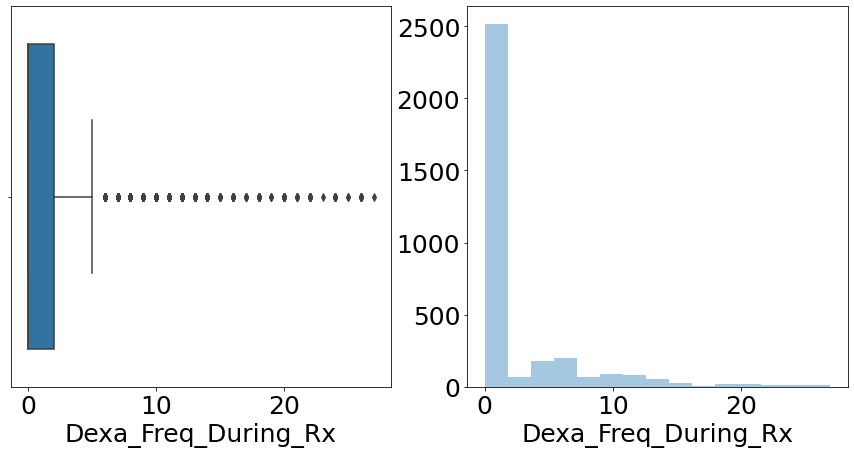

In [30]:
#check data
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = dexa_freq1, ax = axes[0])
sns.distplot(dexa_freq1, bins = 15, kde = False, ax = axes[1])

#there are still few outliers in this column therefore its better to apply another method to remove outliers


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Count_Of_Risks'>

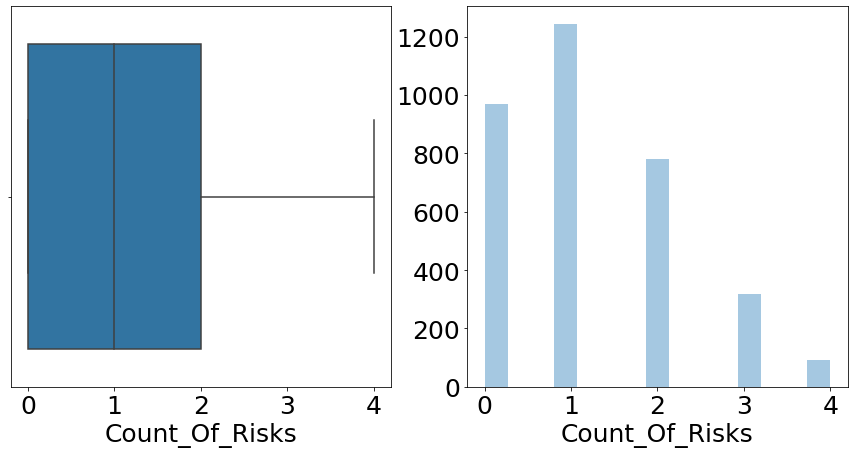

In [31]:
#check data
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = count_of_risks, ax = axes[0])
sns.distplot(count_of_risks, bins = 15, kde = False, ax = axes[1])

# IQR 

In [32]:
#a function to remove outliers
def removeOutliers(dat, col):
    Q3 = np.quantile(data['col'], 0.75)
    Q1 = np.quantile(data['col'], 0.25)
    IQR = Q3 - Q1
     
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 
#for i in data.columns:
    #removeOutliers(data, i)
 
# Assigning filtered data back to our original variable
#data = filtered_data
#print("Shape of data after outlier removal is: ", data.shape)


In [33]:
#remove outliers from count_of_risks column 
col2 = dataset['Count_Of_Risks']
Q3 = np.quantile(col2, 0.75)
Q1 = np.quantile(col2, 0.25)
IQR = Q3 - Q1
print("IQR for Count_of_risks is:", IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
#upper mask
upper_mask = np.where(dataset['Count_Of_Risks'] >= (upper_range))
# Lower mask
lower_mask= np.where(dataset['Count_Of_Risks']<= (lower_range)) 

#
outlier_free_list = [x for x in dataset['Count_Of_Risks'] if ( (x > lower_range) & (x < upper_range))]

filtered_data = dataset.loc[dataset['Count_Of_Risks'].isin(outlier_free_list)]
print(np.shape(filtered_data['Count_Of_Risks']), np.shape(dataset['Count_Of_Risks']))

#results is the same 

IQR for Count_of_risks is: 2.0
(3401,) (3424,)


In [34]:
#remove outliers from count_of_risks column Dexa_freq_during_RX
col1 = dataset['Dexa_Freq_During_Rx']
Q3 = np.quantile(col1, 0.75)
Q1 = np.quantile(col1, 0.25)
IQR = Q3 - Q1
print("IQR for Count_of_risks is:", IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
#upper mask
upper_mask = np.where(dataset['Dexa_Freq_During_Rx'] >= (upper_range))
# Lower mask
lower_mask= np.where(dataset['Dexa_Freq_During_Rx']<= (lower_range)) 

#
outlier_free_list = [x for x in dataset['Dexa_Freq_During_Rx'] if ( (x > lower_range) & (x < upper_range))]

filtered_data = dataset.loc[dataset['Dexa_Freq_During_Rx'].isin(outlier_free_list)]
print(np.shape(filtered_data['Dexa_Freq_During_Rx']), np.shape(dataset['Dexa_Freq_During_Rx']))

#the final dataset, filtered_data reduced its shape from 3424 to 2964

IQR for Count_of_risks is: 3.0
(2964,) (3424,)


# LABEL Encoding for categorical variables

There are lots of categorical variables in the data
One important thing is if the data are nominal or ordinal
For variables that has rank ordering, we use ordinal encoding-
but non of the columns in our dataset has rank ordering so use one hat encoding for columns

In [35]:
cat_cols = dataset.select_dtypes("object").columns
cat_cols

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of

In [36]:
#drop some columns 
cat_cols2 = cat_cols.drop(labels=['Ptid', 'Ntm_Speciality','Ntm_Speciality_Bucket'])

In [37]:
filtered_data.drop('Ntm_Speciality', axis = 1, inplace = True)
#df.drop('column_name', axis=1, inplace=True)
filtered_data.drop('Ntm_Speciality_Bucket', axis = 1, inplace = True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
print(np.shape(filtered_data))

(2964, 67)


In [38]:
dataset2 = pd.get_dummies(filtered_data, columns=cat_cols2)

In [39]:
dataset2

,Ptid,Dexa_Freq_During_Rx,Count_Of_Risks,Persistency_Flag_Non-Persistent,Persistency_Flag_Persistent,Gender_Female,Gender_Male,Race_African American,Race_Asian,Race_Caucasian,...,Risk_Excessive_Thinness_N,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_N,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_N,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_N,Risk_Immobilization_Y,Risk_Recurring_Falls_N,Risk_Recurring_Falls_Y
0,P1,0,0,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,P2,0,0,1,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,P3,0,2,1,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,P4,0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
4,P5,0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,0,1,0,1,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3420,P3421,0,0,0,1,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3421,P3422,7,1,0,1,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
3422,P3423,0,0,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
